In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Confidence Intervals</center></h1>

A <b>confidence interval</b> is a type of interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter. The interval has an associated <b>confidence level</b> that, loosely speaking, quantifies the level of confidence that the parameter lies in the interval.

#### Confidence Intervals for a Population Mean (Large-Sample) :

For $X_1, X_2, ..., X_n$ be a <b>large</b> ($n > 30$) random sample from a population with mean $\mu$ and standard deviation $\sigma$, so that $\overline{X}$ is approximately normal (from Central Limit Theorem). Then a level $100(1- \alpha)%$ confidence interval of $\mu$ is 

$$\overline{X} \pm z_{\alpha/2} \sigma_{\overline{X}}$$

where $\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. When the value of population standard deviation $\sigma$ is unknown, it can be replaced with the sample standard deviation $s$.

<b>Example:</b> The sample mean and standard deviation for the fill weights of 100 boxes are $\overline{X} = 12.05$ and $s = 0.1$. Find an 85% confidence interval for the mean fill weight of the boxes.

<b>Sol:</b> First of all, $1 - \alpha = 85%$, and hence $\frac{\alpha}{2} = .075$. From the <b>z-table</b>, the <b>z-value</b> corresponding to $0.075$ is 1.44. Hence, the confidence interval is

$$12.05 \pm 1.44 (\frac{0.1}{\sqrt{100}}) = 12.05 \pm 0.0144 = (12.0356, 12.0644)$$

Let us design an experiment to understand the meaning of confidence interval in deep. A random data set is generated (treated as population) and 100 random samples of size 1000 are drawn from it and 68%, 95.6% and 99.7% confidence interval for the population mean is computed. The experimental results are well in accordance with the theoretical values.

In [72]:
import random
import numpy as np

random.seed(1)

X = np.array(random.sample(range(1, 100000), 10000))/100000
population_mean = X.mean()

# Generate 100 random samples
count_68 = 0
count_96 = 0
count_99 = 0
for i in range(1000):
    S = np.random.choice(X, size=100, replace=True)
    # Compute 68% confidene interval
    lower = S.mean() - S.std()/10
    upper = S.mean() + S.std()/10
    if (lower <= population_mean and population_mean <= upper):
        count_68 += 1
    # Compute 95% confidene interval
    lower = S.mean() - 1.96*S.std()/10
    upper = S.mean() + 1.96*  S.std()/10
    if (lower <= population_mean and population_mean <= upper):
        count_96 += 1
    # Compute 99.7% confidene interval
    lower = S.mean() - 3*S.std()/10
    upper = S.mean() + 3*  S.std()/10
    if (lower <= population_mean and population_mean <= upper):
        count_99 += 1
print("The percentage of time the 68% confidence interval covers the population mean is: " +str(count_68/10)+"%")
print("The percentage of time the 95.6% confidence interval covers the population mean is: " +str(count_96/10)+"%")
print("The percentage of time the 99.7% confidence interval covers the population mean is: " +str(count_99/10)+"%")

The percentage of time the 68% confidence interval covers the population mean is: 68.0%
The percentage of time the 95.6% confidence interval covers the population mean is: 95.1%
The percentage of time the 99.7% confidence interval covers the population mean is: 99.7%


Sometimes it is required to find the sample size needed for a confidence interval to be of specified width. The needed sample size can be calculated as shown in the below example.

<b>Example:</b> In an experiment, the sample standard deviation of weights from 100 boxes was s = 0.1 oz. How many boxes must be sampled to obtain a 99% confidence interval of width ±0.012 oz?

<b>Sol:</b> For a 99% confidence interval, $\alpha = 0.01$, and hence $z_{\alpha/2} = z_{0.005} = 2.58$. Given, $s= 0.1$ and hence, the required equation is

$$\frac{2.58 \times 0.1}{\sqrt{n}} = 0.012$$

which gives $n \approx 463$.

Sometimes <b>one-sided confidence interval</b> is desirable. The $100(1-\alpha)%$ one sided confidence interval can be calculated as:

$$Lower \ bound  = \overline{X} - z_{\alpha}\sigma_{\overline{X}}$$

$$Upper \ bound  = \overline{X} + z_{\alpha}\sigma_{\overline{X}}$$

where $\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$ and the value of $\sigma$ can be estimated from sample standard deviation $s$.

It should be noted that the method described above is based on the fact that <b>the data is a random sample from the
population</b>. If this condition is violated, the above explained method does not hold true.

#### Confidence Intervals for a Population Mean (Small-Sample) :

For a small sample size, there is no generic method to find the confidence interval for the population mean. However, when the population is <b>approximately normal</b>, a probability distribution called as the <b>Student's t distribution</b> can be used to compute confidence intervals for the population mean. The plot of <b>probability density functions</b> for various Student's t distribution is shown below. The shape of the PDF of Student's t distribution is same as that of the normal distribution but the spread is more. For a sample size of $n$, the degree of freedom of Student's t distribution is $n-1$. As the degree of freedom (or the sample size) increases, the shape of Student's t distribution approximates normal distribution. The plot of Student's t distribution with $df=30$ will be almost indistinguishable from the normal PDF plot.

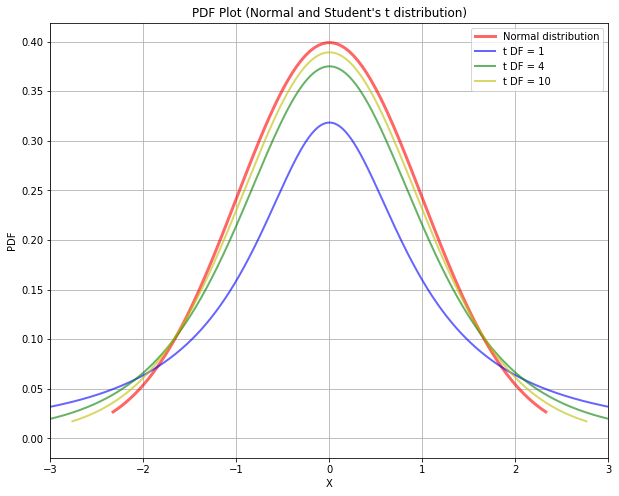

In [88]:
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
# Plot of PDF of normal distribution
ax = fig.add_subplot(111)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x, scale=1), 'r-', lw=3, alpha=0.6, label='Normal distribution')

# Plot of PDF of Student's t distribution
df = 1
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 10000)
ax.plot(x, t.pdf(x, df), 'b-', lw=2, alpha=0.6, label='t DF = 1')

# Plot of PDF of Student's t distribution
df = 4
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 10000)
ax.plot(x, t.pdf(x, df), 'g-', lw=2, alpha=0.6, label='t DF = 4')

# Plot of PDF of Student's t distribution
df = 10
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 10000)
ax.plot(x, t.pdf(x, df), 'y-', lw=2, alpha=0.6, label='t DF = 10')

ax.set_xlabel('X')
ax.set_ylabel('PDF')
ax.set_xlim(-3, 3)
ax.set_title("PDF Plot (Normal and Student's t distribution)")
ax.legend()
ax.grid()

plt.show()

Let $X_1, X_2, ..., X_n$ be a small sample ($n < 30$) from a normal population with mean $\mu$. The quantity

$$\frac{\overline{X} - \mu}{s/\sqrt{n}}$$

will have a Student's t distribution with $n-1$ degree of freedoms, denoted as $t_{n-1}$. For large value of $n$, the distribution of above quantity is close to normal and hence the normal curve can be used. Hence, a $100(1-\alpha)\%$ confidence interval for $\mu$ can be given as:

$$\overline{X} \pm t_{n-1, \alpha/2} \frac{s}{\sqrt{n}}$$

It should be noted that the essential condition for the application of Student's t distribution while computing the confidence interval is the fact that <b>sample comes from a population that is approximately normal</b>. The <b>one-sided</b> confidence interval can be given as:


$$Lower \ bound  = \overline{X} - t_{n-1, \alpha}\frac{s}{\sqrt{n}}$$

$$Upper \ bound  = \overline{X} + t_{n-1, \alpha}\frac{s}{\sqrt{n}}$$

One reason to use Student's t distribution while computing the confidence interval is the fact that the population standard deviation $\sigma$ is unknown and hence is approximated by sample standard deviation $s$. <b>When population standard deviation $\sigma$ is known, normal distribution (z-table) is used instead for the computation of the confidence interval</b>.

#### Confidence Intervals for Proportions :

Let $X$ be the number of successes in $n$ independent Bernoulli trials with success probability $p$, where <b>the number of trials $n$ is large enough</b>, such that $X \sim Bin(n, p)$. Then the $100(1 - \alpha) \%$ confidence interval for $p$ is:

$$\widehat{p} \pm z_{\alpha/2}\sqrt{\frac{\widehat{p}(1-\widehat{p})}{n}}$$

where $\widehat{p}$ is the <b>sample proportion</b> and can be estimated as $\frac{X}{n}$. It should be noted that the quantity under the square root is the <b>sample variance</b>. This method of computation of the confidence interval for the proportion works for large sample size or we can say that the experiment should containt at least 10 successes and 10 failures. 

To tackle the problem of <b>smaller sample size</b>, we need to make certain changes in the above estimate. Let $\widetilde{n} = n+4$ and $\widetilde{p} = \frac{X+2}{\widetilde{n}}$, a $100(1-\alpha)\%$ confidence interval for $p$ is given as:

$$\widetilde{p} \pm z_{\alpha/2}\sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{\widetilde{n}}}$$

If the interval exceeds from the limit, we should limit it by 0 and 1 as lower and upper limit respectively. The above described method is usually preferred for the computation of confidence interval for population proportion of any sample size. The <b>one-sided</b> confidence interval is given as:

$$Lower \ bound  = \widetilde{p} - z_{\alpha}\sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{\widetilde{n}}}$$

$$Upper \ bound  = \widetilde{p} + z_{\alpha}\sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{\widetilde{n}}}$$

where the symbols have the usual meaning.

#### Confidence Intervals for the Difference Between Two Means :

Let $X$ and $Y$ be independent random variables, with $X \sim N(\mu_X, \sigma_X^2)$ and $Y \sim N(\mu_Y, \sigma_Y^2)$, then

$$X+Y \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

$$X-Y \sim N(\mu_X - \mu_Y, \sigma_X^2 + \sigma_Y^2)$$

As the distribution of the difference of two independent normal random variables is normal, we can use this property with the central limit theorem to obtain a confidence interval for the difference of the means. 

Let $X_1, X_2, ..., X_{n_X}$ be a <b>large random sample</b> of size $n_X$ from a population with mean $\mu_X$ and standard deviation $\sigma_X$, and let $Y_1, Y_2, ..., Y_{n_Y}$ be a <b>large random sample</b> of size $n_Y$ from a population with mean $\mu_Y$ and standard deviation $\sigma_Y$. If the two samples are <b>independent</b>, then a $100(1-\alpha) \%$ confidence interval for the difference of means $\mu_X - \mu_Y$ is given as:

$$\overline{X} - \overline{Y} \pm z_{\alpha/2} \sqrt{\frac{\sigma_X^2}{n_X} + \frac{\sigma_Y^2}{n_Y}}$$

If the values of population standard deviations $\sigma_X$ and $\sigma_Y$ are unknown, they can be replaced with sample standard deviation $s_X$ and $s_Y$.

#### Confidence Intervals for the Difference Between Two Proportions :

The confidence interval for the difference between two proportions can be computed in a similar way as described above. Let $X$ and $Y$ be the number of successes in $n_X$ and $n_Y$ independent Bernoulli trials with success probabilities $p_X$ and $p_Y$ respectively, such that $X \sim Bin(n_X, p_X)$ and $Y \sim Bin(n_Y, p_Y)$. Let $\tilde{n_X} = n_X+2$, $\tilde{n_Y} = n_Y+2$, $\tilde{p_X} = \frac{X+1}{\tilde{n_X}}$ and $\tilde{p_Y} = \frac{Y+1}{\tilde{n_Y}}$, then a $100(1 - \alpha) \%$ confidence interval for the difference $p_X - p_Y$ is given as:

$$\tilde{p_X} - \tilde{p_Y} \pm z_{\alpha/2} \sqrt{\frac{\tilde{p_X}(1- \tilde{p_X})}{n_X} + \frac{\tilde{p_Y}(1- \tilde{p_Y})}{n_Y}}$$

If the lower and upper limit go beyond -1 and 1, they should be replaced with -1 and 1 respectively. The adjustments used is similar as the one described for the confidence interval of single proportion, instead they are equally divided amongst the two samples.

If $n_X$ and $n_y$ are <b>large</b> enough, the confidence interval can be given as:

$$\widehat{p_X} - \widehat{p_Y} \pm z_{\alpha/2} \sqrt{\frac{\widehat{p_X}(1- \widehat{p_X})}{n_X} + \frac{\widehat{p_Y}(1- \widehat{p_Y})}{n_Y}}$$

where $\widehat{p_X}$ and $\widehat{p_Y}$ are the probability of successes. This method can only be used if both the samples contain at least 10 successes and 10 failures.

#### Confidence Intervals for the Difference Between Two Means (Small-Sample) :

The confidence interval for the difference between two means for small sample sizes can be computed using the <b>Student's t distribution</b>. As the sample size is small, the central limit theorem can not be applied and given that both the population is <b>normal</b>, the Student's t distribution can be used to compute the confidence interval.

Let $X_1, X_2, ..., X_{n_X}$ and $Y_1, Y_2, ..., Y_{n_Y}$ be two independent random samples of size $n_X$ and $n_Y$ from a <b>normal</b> population with mean $\mu_X$ and $\mu_Y$ respectively, then a $100(1-\alpha) \%$ confidence interval for $\mu_X - \mu_Y$ is given as:

$$\overline{X} - \overline{Y} \pm t_{v, \alpha/2} \sqrt{\frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}}$$

where the population standard deviations are estimated from sample standard deviations as $s_X$ and $s_Y$ respectively and the number of <b>degree of freedoms</b> $v$ of the $t$-distribution is given as:

$$v = \frac{\big( \frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y}\big)^2}{\frac{(\frac{s_X^2}{n_X})^2}{n_X-1} + \frac{(\frac{s_Y^2}{n_Y})^2}{n_Y-1}}$$

When the <b>two population have equal variances</b>, we can use the pooled sample variances as the estimate of the population variance. The confidence interval in this case is given as:

$$\overline{X} - \overline{Y} \pm t_{n_X+n_Y-2, \alpha/2} \times s_p \sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}$$

where $s_p$ is the <b>pooled standard deviation</b> and is given as:

$$s_p = \sqrt{\frac{(n_X-1)s_X^2 + (n_Y-1)s_Y^2}{n_X + n_Y - 2}}$$

One common miss-conception while using this method is the assumption that if the sample variances are equal, the population variances are equal. For a smaller sample size, sample variance does not serve as a good approximation for the population variance and hence this assumption will not be true.

#### Confidence Intervals with Paired Data :

Sometimes an experiment is designed in such a way that each item in one sample is paired with an item in the other. Let $D_1, D-2, ..., D_n$ be a <b>small</b> random sample $(n \leq 30)$ of differences of the paired data. If the population of differences is approximately <b>normal</b>, the $100(1 - \alpha) \%$ confidence interval for the mean difference $\mu_D$ is given as:

$$\overline{D} \pm t_{n-1, \alpha/2} \frac{s_D}{\sqrt{n}}$$

where $s_D$ is the <b>sample standard deviation</b> of $D_1, D_2, ..., D_n$. If the sample size is <b>large</b>, the confidence interval is given as:

$$\overline{D} \pm z_{\alpha/2} \frac{s_D}{\sqrt{n}}$$

#### Confidence Intervals for the Variance and Standard Deviation of a Normal Population :

Confidence interval for the population variance $\sigma^2$ (when the population is normal) is based on sample variance $s^2$ and a probability distribution known as <b>chi-square distribution</b>. To be more specific, if $X_1, X_2, ..., X_n$ is a random sample from a normal population with variance $\sigma^2$, the sample variance can be given as:

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline{X})^2$$

The quantity 

$$\frac{(n-1)s^2}{\sigma^2} = \frac{\sum_{i=1}^{n} (X_i - \overline{X})^2}{\sigma^2}$$

follows a <b>chi-square</b> distribution with degree of freedom $n-1$ and is denoted as $\chi_{n-1}^2$. The plot of chi-square distribution for various degree of freedoms is shown below. It should be noted that chi-square distribution are <b>right-skewed</b> and the value of chi-square statistic is always positive. Due to <b>asymmetric</b> nature of the chi-square distribution, the upper and lower conficence bound is computed by two different quantities. To find the upper and lower bounds for a $100(1 - \alpha) \%$ confidence interval for a variance, the values that cut off areas of $\frac{\alpha}{2}$ in the right and left tails of the chi-square probability density curve are used. The calculation of confidence interval is shown by an example below.

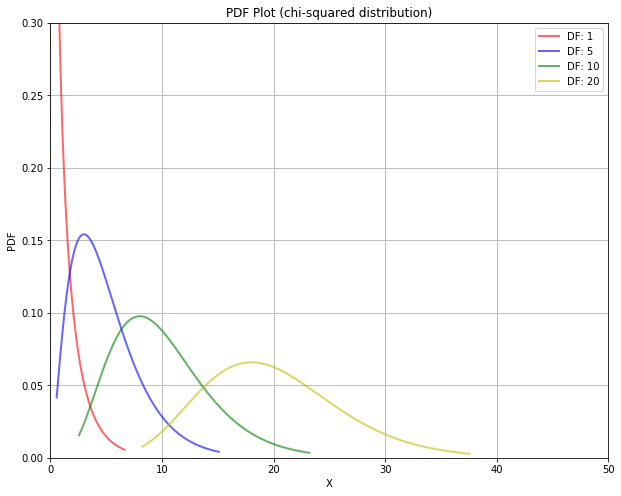

In [107]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

df=1
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=2, alpha=0.6, label='DF: '+str(df))

df=5
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
ax.plot(x, chi2.pdf(x, df), 'b-', lw=2, alpha=0.6, label='DF: '+str(df))

df=10
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
ax.plot(x, chi2.pdf(x, df), 'g-', lw=2, alpha=0.6, label='DF: '+str(df))

df=20
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
ax.plot(x, chi2.pdf(x, df), 'y-', lw=2, alpha=0.6, label='DF: '+str(df))

ax.set_ylim(0, 0.30)
ax.set_xlim(0, 50)
ax.set_xlabel('X')
ax.set_ylabel('PDF')
ax.set_title("PDF Plot (chi-squared distribution)")
ax.legend()
ax.grid()

plt.show()

<b>Example:</b> A simple random sample of 15 pistons is selected from a large population whose diameters are known to be normally distributed. The sample standard deviation of the piston diameters is s = 2.0 mm. Find a 95% confidence for the population variance $\sigma^2$ and population standard deviation $\sigma$.

<b>Sol:</b> The degree of freedom of chi-square distribution is $n-1 = 14$. From chi-square table, the upper and lower cut off points can be found as $\chi_{14, .975} = 5.63$ and $\chi_{14, .025} = 26.12$, i.e.

$$5.63 < \frac{(n-1)s^2}{\sigma^2} < 26.12$$

Solving this we get, $2.144 < \sigma^2 < 9.948$. The confidence interval for the population standard deviation $\sigma$ can be computed by taking the square root: $1.464 < \sigma < 3.154$.

The calculation of confidence interval based on chi-square distribution requires that the population is <b>normal</b>. If the population distribution deviates from normal, the calculated confidence interval can be misleading.

#### Prediction Intervals :

A <b>prediction interval</b> is the interval that is likely to contain the value of an item sampled from a population at a future time. Let $\overline{X}$ be the sample mean of $n$ samples from a normally distributed population. It will have a normal distribution which can be given by $\overline{X} \sim N(\mu, \sigma^2/n)$. Suppose, at a future point, a value $Y$ is observed from the population. The distribution of $Y$ will be same as the population distribution, $Y \sim N(\mu, \sigma^2)$. Hence, the difference $Y - \overline{X}$ will be normally distributed with mean 0 and variance $\sigma^2(1 + 1/n)$. i.e. 

$$\frac{Y - \overline{X}}{\sigma\sqrt{1 + 1/n}} \sim N(0, 1)$$

The population standard deviation $\sigma$ can be estimated as the sample standard deviation $s$ and hence the <b>prediction interval</b> can be given as:

$$\overline{X} \pm z_{\alpha/2} \times s\sqrt{1 + \frac{1}{n}}$$

For a <b>smaller</b> sample size, <b>Student's t distribution</b> is used and the prediction interval can be given as:

$$\overline{X} \pm t_{n-1, \alpha/2} \times s\sqrt{1 + \frac{1}{n}}$$

<b>One-sided</b> prediction interval can be found similarly:

$$Lower \ bound  = \overline{X} - t_{n-1, \alpha} \times s\sqrt{1 + \frac{1}{n}}$$

$$Upper \ bound  = \overline{X} + t_{n-1, \alpha} \times s\sqrt{1 + \frac{1}{n}}$$